<a href="https://colab.research.google.com/github/breno-jesus-fernandes/p1-ciencia-de-dados/blob/main/P1_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Universidade Prebeteriana Mackenzie
- Faculdade de Informatica e Computacao
- Aluno: Breno de Jesus Fernandes
- TIA: 41890590

# 1 - Problema

## 1.1 - Descricao do Problema pelo professor

- Peça a um comprador de imóvel residencial que descreva a casa dos seus sonhos e ele provavelmente não começará com a altura do teto do porão ou com a proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição de playground prova que as negociações de preços influenciam muito mais do que o número de quartos ou uma cerca branca.

- Com 79 variáveis ​​explicativas que descrevem (quase) todos os aspectos das casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

- O conjunto de dados Ames Housing foi compilado por Dean De Cock para uso no ensino de ciência de dados. É uma alternativa incrível para cientistas de dados que procuram uma versão modernizada e expandida do frequentemente citado conjunto de dados Boston Housing.



- Desafio original postado no Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview). Acesse o link para baixar o conjunto de dados e executar o projeto(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

- Objetivos

É sua função prever os preços de venda de cada casa. Para cada ID no conjunto de teste, você deve prever o valor da variável SalePrice. O arquivo de saída estar no formato de exemplo:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221

- Métrica

As submissões são avaliadas em Root-Mean-Squared-Error (RMSE) entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (Fazer registros significa que erros na previsão de casas caras e casas baratas afetarão igualmente o resultado.) O cálculo da métrica de performance do seu modelo vale 15% da nota da atividade

## 1.2 - Intepretacao do Problema pelo aluno e hipotese de solucao

- Realizar processo de ciencia de dados no dataset para resolver o problema de previsao utilizando a metrica RMSE como parametro de sucesso do modelo.

# 2 - Solucao do Problema

## 2.1 - Analise Exploratoria

### 2.1.1 - Carga e Checks Basicos

In [157]:
import pandas as pd

# Carregando conjunto de treino
train_df = pd.read_csv('https://raw.githubusercontent.com/breno-jesus-fernandes/p1-ciencia-de-dados/main/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
# Carregando conjunto de testes
test_df = pd.read_csv('https://raw.githubusercontent.com/breno-jesus-fernandes/p1-ciencia-de-dados/main/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [159]:
# copiamos a coluna de id para utilizar no final nas nossas predicoes desse conjunto de testes
test_id = test_df['Id'].copy()

In [160]:
# Verifica dimensoes do conjunto de teste vs treino
train_rows, train_columns = train_df.shape
test_rows, test_columns = test_df.shape

print(f'Quantidade de linhas no conjunto de treino: {train_rows}')
print(f'Quantidade de colunas no conjunto de treino: {train_columns}')
print(f'Quantidade de linhas no conjunto de teste: {test_rows}')
print(f'Quantidade de colunas no conjunto de teste: {test_columns}')

Quantidade de linhas no conjunto de treino: 1460
Quantidade de colunas no conjunto de treino: 81
Quantidade de linhas no conjunto de teste: 1459
Quantidade de colunas no conjunto de teste: 80


**WARNING! Pq os conjuntos nao possuem mesmo numero de colunas?**

In [161]:
# Verifica quais colunas sao diferentes
set(train_df.columns.values) - set(test_df.columns.values)

{'SalePrice'}

**Conclusao: O conjunto de testes nao possui o preco de venda pois o objetivo mostra que devemos preve-lo**

In [162]:
# Teste de sanidade se todos possuem mesmos tipos
set(train_df.drop('SalePrice', axis=1).dtypes) - set(test_df.dtypes)

set()

**Conclusao: Ambos conjutos de dados possui os campos nao divergentes**

### 2.1.2 Aprofundamento da analise

#### 2.1.2.1 - Verificao de nulos

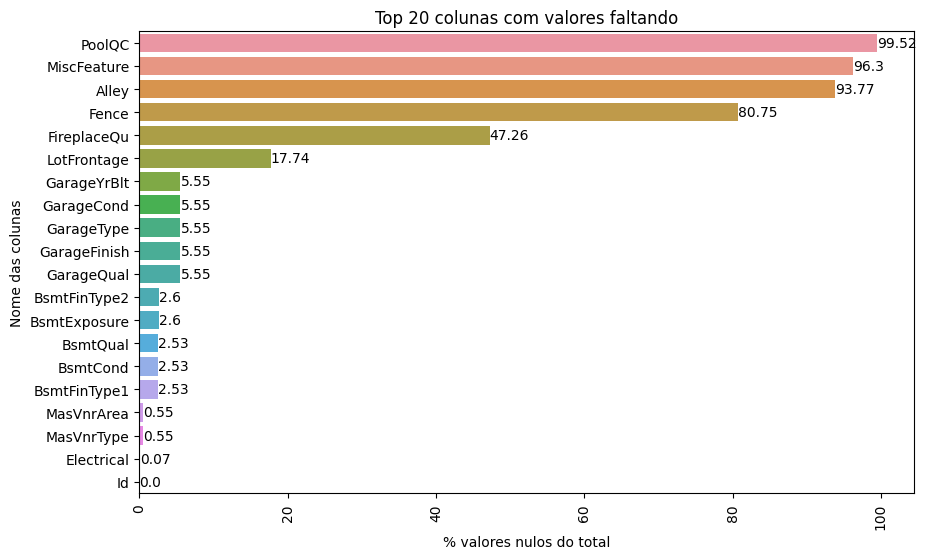

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conta o numero de nulls em cada coluna
null_counts = train_df.isnull().sum()

# Pega os N com mais nulos
top_n = 20
top_null_columns = round((null_counts.sort_values(ascending=False).head(top_n) / train_df.shape[0]) * 100, 2)

# Plota o grafico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_null_columns.values, y=top_null_columns.index)
plt.xticks(rotation=90)
plt.title(f'Top {top_n} colunas com valores faltando')
plt.ylabel('Nome das colunas')
plt.xlabel('% valores nulos do total')

# Add qtd em cada barra
for index, value in enumerate(top_null_columns.values):
    ax.text(value, index, str(value), color='black', ha="left", va="center")

plt.show()


#### 2.1.2.1 - Variaveis Discretas Vs Continuas

In [164]:
categorical_df = train_df.select_dtypes(include=['object'])
categorical_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [165]:
categorical_df = train_df.select_dtypes(include=['object'])
categorical_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [166]:
categorical_df.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [167]:
continuos_df = train_df.select_dtypes(exclude=['object'])
continuos_df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [168]:
continuos_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.2 - Feature Enginner

In [169]:
# Remove as colunas com muitos nulos
drop_columns = top_null_columns[top_null_columns > 0].index.tolist()

train_df.drop(drop_columns, axis=1, inplace=True)
test_df.drop(drop_columns, axis=1, inplace=True)

In [170]:
from sklearn.preprocessing import StandardScaler

# Pega as colunas com valores continuos
continuos_columns = train_df.drop('SalePrice', axis=1).select_dtypes(exclude=['object']).columns

scaler = StandardScaler()
scaler.fit(train_df[continuos_columns])

# Aplica escala
train_df[continuos_columns] = scaler.transform(train_df[continuos_columns])
test_df[continuos_columns] = scaler.transform(test_df[continuos_columns])

In [171]:
from sklearn.preprocessing import OneHotEncoder

# Pega as colunas categorircas
categorical_columns = train_df.select_dtypes('object').columns

# Transforma texto em numeros
train_df[categorical_columns] = train_df[categorical_columns].astype('category')
train_df[categorical_columns] = train_df[categorical_columns].apply(lambda column: column.cat.codes, axis=0)

# Define e treina One hot encoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int).fit(train_df[categorical_columns])

# Transforma porcao selecionada do dataframe
transformed_train = enc.transform(train_df[categorical_columns].to_numpy())
transformed_test = enc.transform(test_df[categorical_columns].to_numpy())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [172]:
# Adquire novos nomes das feature para as novas colunas
new_cols = enc.get_feature_names_out()

# Cria uma dataframe de colunas one hot encoded
ohe_train_df = pd.DataFrame(transformed_train.reshape(-1,len(new_cols)), columns=new_cols)
ohe_test_df = pd.DataFrame(transformed_test.reshape(-1,len(new_cols)), columns=new_cols)

# Dropa antigas colunas categoricas
train_df.drop(list(categorical_columns.values), axis=1, inplace=True)
test_df.drop(list(categorical_columns.values), axis=1, inplace=True)

# Concatena com os dados originais with original data
train_df = pd.concat([train_df, ohe_train_df], axis=1)
test_df = pd.concat([test_df, ohe_test_df], axis=1)

In [173]:
train_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.288653,0.873321,...,0,0,0,1,0,0,0,0,1,0
1456,1.723747,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,0.722112,0.049262,...,0,0,0,1,0,0,0,0,1,0
1457,1.726120,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.369871,-0.288653,0.701265,...,0,0,0,1,0,0,0,0,1,0
1458,1.728492,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.865548,6.092188,-1.284176,...,0,0,0,1,0,0,0,0,1,0


In [174]:
target = train_df['SalePrice']
train_df.drop(['Id', 'SalePrice'], axis=1, inplace=True)

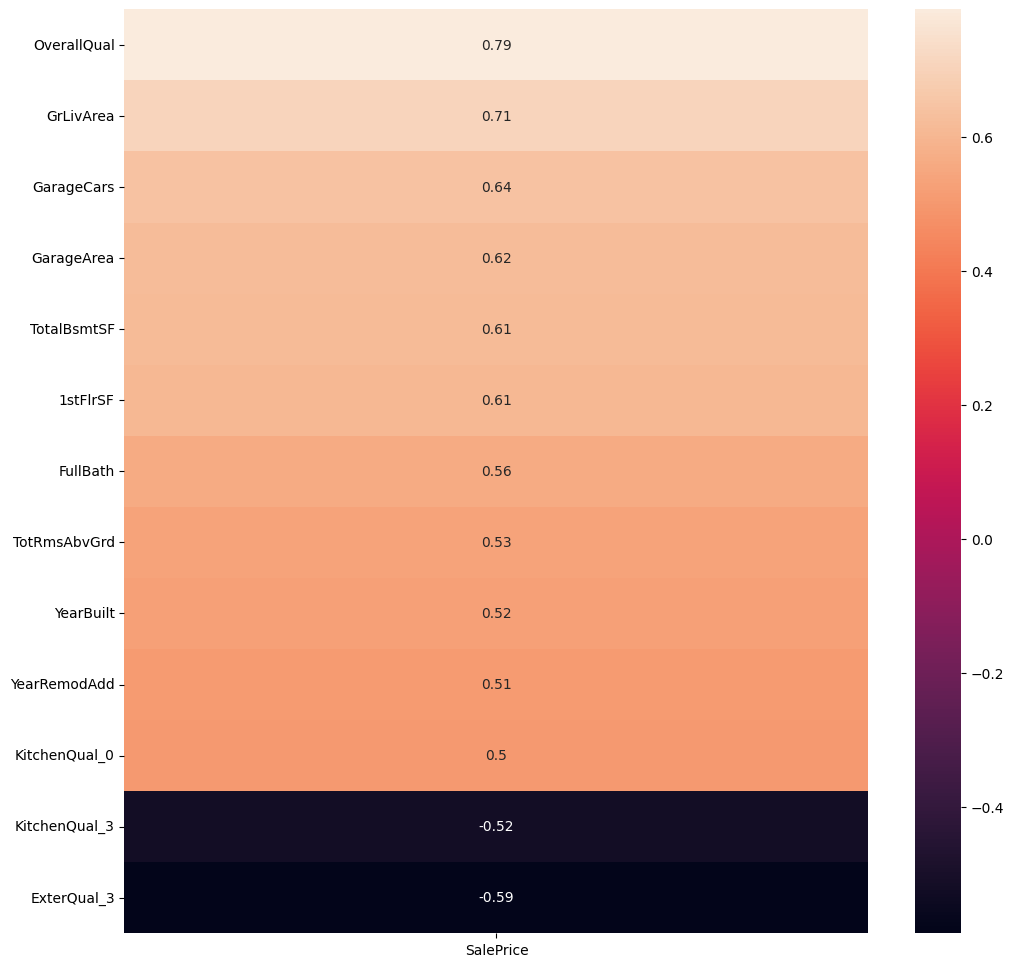

In [175]:

data_plot = pd.concat([train_df, target], axis=1)

fig, ax = plt.subplots(figsize=(12, 12))
correlation_df = data_plot.corr()
correlation_df.drop(['SalePrice'], axis=0, inplace=True)
high_correlation_variables = correlation_df.index[(abs(correlation_df["SalePrice"]) >= 0.5) | (abs(correlation_df["SalePrice"]) <= -0.5)]

sns.heatmap(pd.DataFrame(correlation_df.loc[high_correlation_variables,'SalePrice']).sort_values(by=['SalePrice'], ascending=False), annot = True);

## 2.3 - Divisao de conjunto de treino e teste

In [176]:
from sklearn.model_selection import train_test_split

X = train_df
y = target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1984)

## 2.4 - Selecao do Modelo

In [177]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(seed=1984)
xgb_model.fit(X_train, y_train, verbose=False, eval_set=[(X_train, y_train), (X_val, y_val)])

import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = xgb_model.predict(X_val)
rmse_train_xgb = mean_squared_error(np.log(y_val), np.log(y_pred), squared=True)
print(f'Mean squared error - Training set: {rmse_train_xgb}')

Mean squared error - Training set: 0.027310798591068677


In [179]:
from sklearn.svm import SVR

# Create an SVR model with a radial basis function (RBF) kernel
svr_model = SVR(kernel='rbf')

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Predict target variable for the testing set
y_pred = svr_model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(np.log(y_val), np.log(y_pred), squared=True)

# Display the RMSE
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.14832886938152484


In [180]:
from sklearn.linear_model import ElasticNet

# Initialize and train the Elastic Net Model
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)


# Predict target variable for the testing set
y_pred = elastic_net_model.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(np.log(y_val), np.log(y_pred), squared=True)

# Display the RMSE
print("Root Mean Squared Error: ", rmse)


Root Mean Squared Error:  0.030729684621677213


## 2.5 - Treinamento e Predicao do Conjunto de teste com modelo escolhido

In [197]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(seed=1984)
xgb_model.fit(X_train, y_train, verbose=False, eval_set=[(X_train, y_train), (X_val, y_val)])

import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = xgb_model.predict(test_df.drop('Id', axis=1))
predict_df = pd.DataFrame(test_id)
predict_df['SalePrice'] = y_pred
predict_df

,Id,SalePrice
0,1461,111896.039062
1,1462,142931.390625
2,1463,173703.421875
3,1464,162938.218750
4,1465,161092.109375
...,...,...
1454,2915,72189.406250
1455,2916,92342.539062
1456,2917,149341.843750
1457,2918,101616.898438


In [186]:
len(y_pred)

292

# 3 - Qual chance de estar errado?